In [75]:
import matplotlib.pyplot as plt
import numpy as np
from mnist import read

flat_shape = 28 * 28

%matplotlib inline

In [124]:
# Do some PCA
from sklearn.decomposition import PCA

reader = read()

batch_size = 60000

x = np.zeros((batch_size, flat_shape))
y = np.zeros(batch_size)
for i in range(batch_size):
    img = next(reader)

    x[i] = img[1].reshape(flat_shape)
    y[i] = img[0]


my_pca = PCA(10)

x_transformed = my_pca.fit_transform(x)

In [147]:
from sklearn.model_selection import train_test_split
X_train, unlabeled, y_train, y_unlabelled = train_test_split(x_transformed, y, test_size=60000-10, train_size=10,
                                                    random_state=42, stratify=y)

In [148]:
print(unlabeled.shape)

(59990, 10)


In [143]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [222]:
predictions = model.predict_proba(unlabeled)

prob_max = np.argmax(predictions, axis=1)

y_hat = predictions[np.arange(len(predictions)), prob_max]

least_confident = np.argmax(1 - y_hat)

print(least_confident)

print(predictions[332])
print(max(predictions[332]))



332
[ 0.13666667  0.11666667  0.09166667  0.09833333  0.12666667  0.11666667
  0.045       0.12        0.05        0.09833333]
0.136666666667


array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [8, 8, 0, 0, 8, 0, 0, 4, 0, 1]])

In [144]:
reader = read()

Predicted:  9
Confidence:  [ 0.03666667  0.11666667  0.09166667  0.09833333  0.14333333  0.03333333
  0.07833333  0.02        0.16666667  0.215     ]
Actual:  9


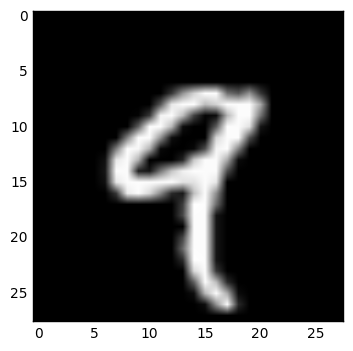

In [151]:
img = next(reader)

X = my_pca.transform(img[1].reshape(flat_shape).reshape(1, -1))

answer = model.predict_proba(X)

print("Predicted: ", np.argmax(answer[0]))
print("Confidence: ", answer[0])
print("Actual: ", img[0])

plt.imshow(img[1], cmap=plt.cm.gray)

Predicted:  [0]
Actual:  0


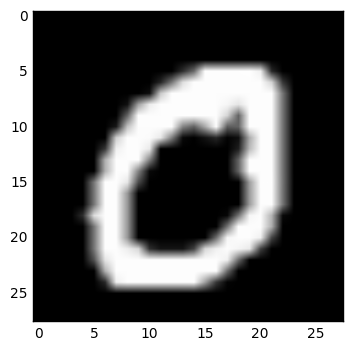